_Machine Learning Dr.Aliyari_


**Masih Mokhtari**

**40211454**
****
_mini project $2$_

$Q3$

At first we disable warnings.

In [64]:
import warnings
warnings.filterwarnings("ignore") # Disable all warnings

Before we start, we have to import libraries we need.

In [89]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import fetch_covtype
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

import graphviz
import pydotplus
from IPython.display import Image

from sklearn.model_selection import cross_val_score

Load Dataset :  Drugs A, B, C, X, Y Dataset

In [66]:
# https://drive.google.com/file/d/1ebhR9slD_JJKsP-TXFKrfhP_V8D4QN4C/view?usp=sharing
!gdown 1ebhR9slD_JJKsP-TXFKrfhP_V8D4QN4C

Downloading...
From: https://drive.google.com/uc?id=1ebhR9slD_JJKsP-TXFKrfhP_V8D4QN4C
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 16.5MB/s]


In [67]:
drug_data = pd.read_csv("/content/drug200.csv")
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [68]:
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [69]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


The number of unique values in the column "Drug" is 5
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


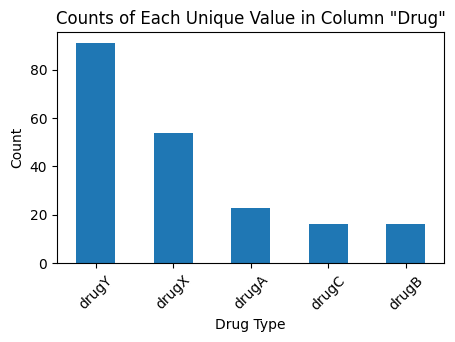

In [70]:
column_name = 'Drug'
num_unique_values = drug_data[column_name].nunique()
value_counts = drug_data[column_name].value_counts()
print(f'The number of unique values in the column "{column_name}" is {num_unique_values}')
print(value_counts)

# Plotting the value counts
plt.figure(figsize=(5, 3))
value_counts.plot(kind='bar')
plt.title(f'Counts of Each Unique Value in Column "{column_name}"')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [71]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [72]:
unique_values_Sex = np.unique(drug_data["Sex"])
unique_values_BP = np.unique(drug_data["BP"])
unique_values_Cholesterol = np.unique(drug_data["Cholesterol"])

print("unique_values_Sex = " ,unique_values_Sex)
print("unique_values_BP = ", unique_values_BP)
print("unique_values_Cholesterol", unique_values_Cholesterol)

Sex_mapping = {'F': 1, 'M': 2}
BP_mapping = {'HIGH': 1, 'LOW': 2, 'NORMAL': 3}
Cholesterol_mapping = {'HIGH': 1, 'NORMAL': 2}

drug_data['Sex'] = drug_data['Sex'].replace(Sex_mapping)
drug_data['BP'] = drug_data['BP'].replace(BP_mapping)
drug_data['Cholesterol'] = drug_data['Cholesterol'].replace(Cholesterol_mapping)

X_drug = drug_data.drop(columns=['Drug']).values
y_drug = drug_data['Drug'].values

unique_values_Sex =  ['F' 'M']
unique_values_BP =  ['HIGH' 'LOW' 'NORMAL']
unique_values_Cholesterol ['HIGH' 'NORMAL']


In [73]:
X_drug
features = drug_data.drop(columns='Drug')

True Label: 
 ['drugY' 'drugY' 'drugA' 'drugY' 'drugB' 'drugY' 'drugB' 'drugY' 'drugA'
 'drugY' 'drugB' 'drugX' 'drugY' 'drugY' 'drugX' 'drugA' 'drugY' 'drugY'
 'drugC' 'drugB' 'drugY' 'drugX' 'drugY' 'drugY' 'drugX' 'drugB' 'drugC'
 'drugY' 'drugY' 'drugX'] 
 
 Predicted Label: 
 ['drugY' 'drugY' 'drugA' 'drugY' 'drugB' 'drugY' 'drugB' 'drugY' 'drugA'
 'drugY' 'drugA' 'drugX' 'drugY' 'drugY' 'drugX' 'drugA' 'drugY' 'drugY'
 'drugX' 'drugB' 'drugY' 'drugX' 'drugY' 'drugY' 'drugX' 'drugB' 'drugX'
 'drugY' 'drugY' 'drugX']
Accuracy: 
0.9


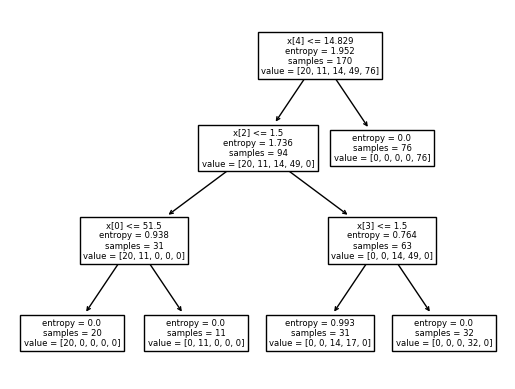

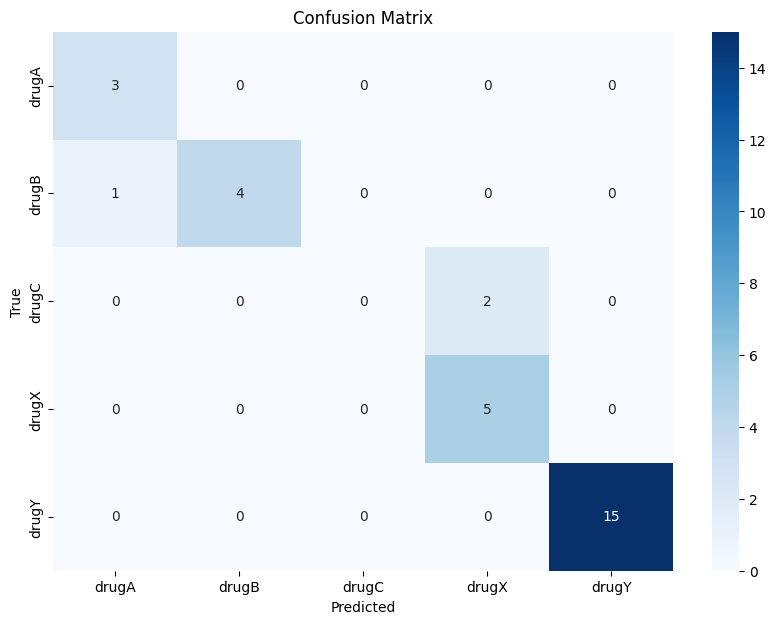

Classification Report: 

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       1.00      0.80      0.89         5
       drugC       0.00      0.00      0.00         2
       drugX       0.71      1.00      0.83         5
       drugY       1.00      1.00      1.00        15

    accuracy                           0.90        30
   macro avg       0.69      0.76      0.72        30
weighted avg       0.86      0.90      0.87        30



In [74]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drug, y_drug, random_state=54, test_size=0.15)
X_train_d.shape, X_test_d.shape

clf = tree.DecisionTreeClassifier(random_state=54, ccp_alpha=0.1, criterion='entropy', splitter='best' ,max_depth=3) #,max_depth=3
clf.fit(X_train_d, y_train_d)

tree.plot_tree(clf)
y_pred = clf.predict(X_test_d)
print(f"True Label: \n {y_test_d} \n \n Predicted Label: \n {y_pred}")
print(f"Accuracy: \n{clf.score(X_test_d, y_test_d)}")

conf_matrix = confusion_matrix( y_test_d, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report: \n")
print(classification_report(y_test_d,y_pred))

## Balanced Dataset

Drug
drugY    91
drugX    91
drugA    91
drugC    91
drugB    91
Name: count, dtype: int64
     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   1            1   25.355  drugY
4     61    1   2            1   18.043  drugY
6     49    1   3            1   16.275  drugY
8     60    2   3            1   15.171  drugY
9     43    2   2            2   19.368  drugY
..   ...  ...  ..          ...      ...    ...
64    60    1   1            1   13.303  drugB
64    60    1   1            1   13.303  drugB
108   72    2   1            2    9.677  drugB
138   51    2   1            2   11.343  drugB
56    65    2   1            2   11.340  drugB

[455 rows x 6 columns]


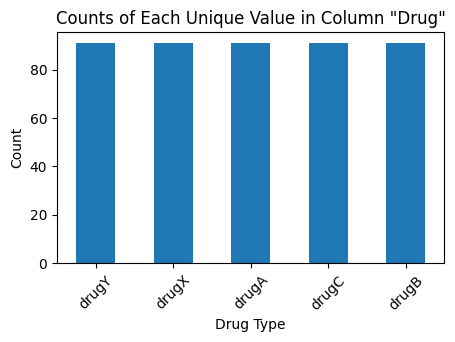

In [75]:
import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = drug_data[drug_data.Drug == 'drugY']  # Assuming 0 is the majority class
df_minority_1 = drug_data[drug_data.Drug == 'drugX']
df_minority_2 = drug_data[drug_data.Drug == 'drugA']
df_minority_3 = drug_data[drug_data.Drug == 'drugC']
df_minority_4 = drug_data[drug_data.Drug == 'drugB']

# Upsample minority classes
df_minority_1_upsampled = resample(df_minority_1,
                                 replace=True,     # sample with replacement
                                 n_samples=91,    # to match majority class
                                 random_state=54) # reproducible results

df_minority_2_upsampled = resample(df_minority_2,
                                 replace=True,
                                 n_samples=91,
                                 random_state=54)

df_minority_3_upsampled = resample(df_minority_3,
                                 replace=True,
                                 n_samples=91,
                                 random_state=54)

df_minority_4_upsampled = resample(df_minority_4,
                                 replace=True,
                                 n_samples=91,
                                 random_state=54)

# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled,
                          df_minority_3_upsampled, df_minority_4_upsampled])

# Display new class counts
print(df_upsampled['Drug'].value_counts())

# Display the upsampled dataset
print(df_upsampled)

# Plotting the value counts
plt.figure(figsize=(5, 3))
df_upsampled['Drug'].value_counts().plot(kind='bar')
plt.title(f'Counts of Each Unique Value in Column "{column_name}"')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [76]:
df_upsampled

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,drugY
4,61,1,2,1,18.043,drugY
6,49,1,3,1,16.275,drugY
8,60,2,3,1,15.171,drugY
9,43,2,2,2,19.368,drugY
...,...,...,...,...,...,...
64,60,1,1,1,13.303,drugB
64,60,1,1,1,13.303,drugB
108,72,2,1,2,9.677,drugB
138,51,2,1,2,11.343,drugB


In [77]:
unique_values_Sex = np.unique(df_upsampled["Sex"])
unique_values_BP = np.unique(df_upsampled["BP"])
unique_values_Cholesterol = np.unique(df_upsampled["Cholesterol"])

print("unique_values_Sex = " ,unique_values_Sex)
print("unique_values_BP = ", unique_values_BP)
print("unique_values_Cholesterol", unique_values_Cholesterol)

Sex_mapping = {'F': 1, 'M': 2}
BP_mapping = {'HIGH': 1, 'LOW': 2, 'NORMAL': 3}
Cholesterol_mapping = {'HIGH': 1, 'NORMAL': 2}

df_upsampled['Sex'] = df_upsampled['Sex'].replace(Sex_mapping)
df_upsampled['BP'] = df_upsampled['BP'].replace(BP_mapping)
df_upsampled['Cholesterol'] = df_upsampled['Cholesterol'].replace(Cholesterol_mapping)

unique_values_Sex =  [1 2]
unique_values_BP =  [1 2 3]
unique_values_Cholesterol [1 2]


In [78]:
df_upsampled.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,drugY
4,61,1,2,1,18.043,drugY
6,49,1,3,1,16.275,drugY
8,60,2,3,1,15.171,drugY
9,43,2,2,2,19.368,drugY


## Part1:Train Test Split

In [79]:
X_drug = df_upsampled.drop(columns=['Drug']).values
y_drug = df_upsampled['Drug'].values

In [80]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drug, y_drug, random_state=54, test_size=0.15)
X_train_d.shape, X_test_d.shape

((386, 5), (69, 5))

## Part2

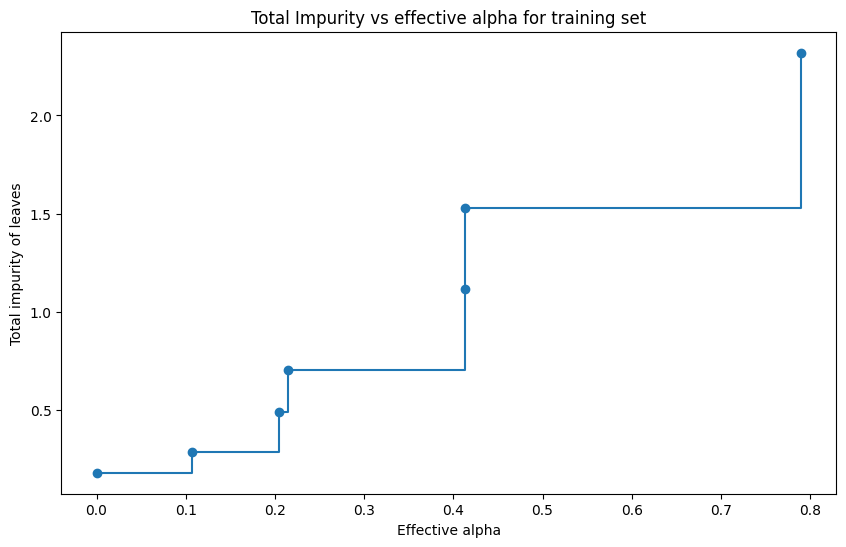

DecisionTreeClassifier(ccp_alpha=0.01)

In [81]:
path = clf.cost_complexity_pruning_path(X_train_d, y_train_d)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# plot ccp_alpha-impurities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

# the best ccp_alpha
optimal_ccp_alpha = 0.01
clf = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train_d, y_train_d)

In [90]:
clf = tree.DecisionTreeClassifier(random_state=54, ccp_alpha=0.1, criterion='entropy', splitter='best' ,max_depth=3) #,max_depth=3
clf.fit(X_train_d, y_train_d)

DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=3,
                       random_state=54)

True Label: 
 ['drugX' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'drugX' 'drugX' 'drugA'
 'drugY' 'drugA' 'drugX' 'drugA' 'drugA' 'drugB' 'drugB' 'drugX' 'drugC'
 'drugB' 'drugB' 'drugC' 'drugC' 'drugX' 'drugY' 'drugA' 'drugB' 'drugB'
 'drugX' 'drugX' 'drugC' 'drugB' 'drugB' 'drugB' 'drugB' 'drugA' 'drugX'
 'drugX' 'drugB' 'drugY' 'drugB' 'drugC' 'drugX' 'drugC' 'drugC' 'drugY'
 'drugX' 'drugA' 'drugA' 'drugX' 'drugX' 'drugY' 'drugC' 'drugY' 'drugY'
 'drugA' 'drugX' 'drugC' 'drugC' 'drugX' 'drugB' 'drugC' 'drugB' 'drugA'
 'drugB' 'drugC' 'drugA' 'drugY' 'drugX' 'drugC'] 
 
 Predicted Label: 
 ['drugX' 'drugX' 'drugC' 'drugC' 'drugA' 'drugC' 'drugX' 'drugX' 'drugA'
 'drugY' 'drugA' 'drugX' 'drugA' 'drugA' 'drugB' 'drugB' 'drugC' 'drugC'
 'drugB' 'drugB' 'drugC' 'drugC' 'drugX' 'drugY' 'drugA' 'drugB' 'drugB'
 'drugC' 'drugX' 'drugC' 'drugB' 'drugB' 'drugB' 'drugB' 'drugA' 'drugX'
 'drugC' 'drugB' 'drugY' 'drugB' 'drugC' 'drugX' 'drugC' 'drugC' 'drugY'
 'drugC' 'drugA' 'drugA' 'drugX' 'dru

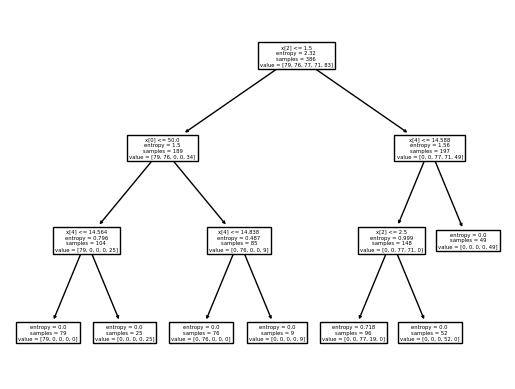

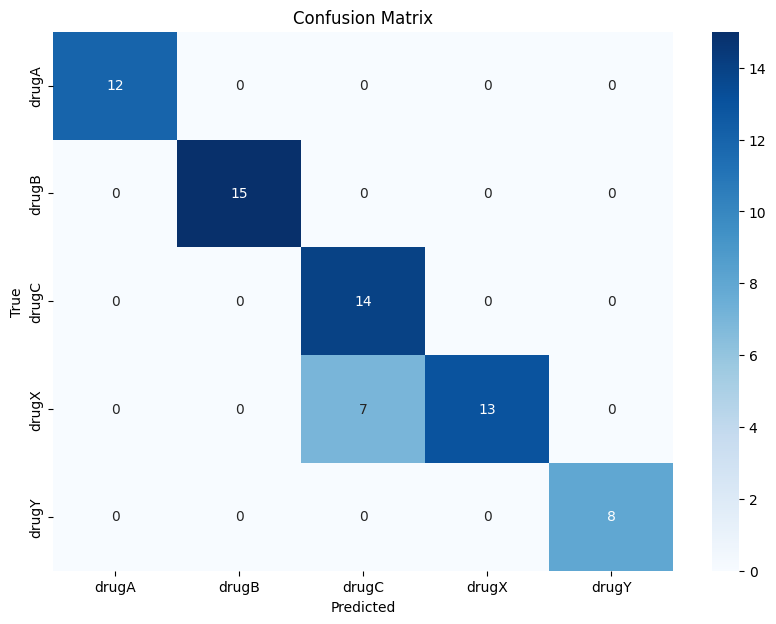

Classification Report: 

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        12
       drugB       1.00      1.00      1.00        15
       drugC       0.67      1.00      0.80        14
       drugX       1.00      0.65      0.79        20
       drugY       1.00      1.00      1.00         8

    accuracy                           0.90        69
   macro avg       0.93      0.93      0.92        69
weighted avg       0.93      0.90      0.90        69



In [91]:
tree.plot_tree(clf)
y_pred = clf.predict(X_test_d)
print(f"True Label: \n {y_test_d} \n \n Predicted Label: \n {y_pred}")
print(f"Accuracy: \n{clf.score(X_test_d, y_test_d)}")

conf_matrix = confusion_matrix( y_test_d, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report: \n")
print(classification_report(y_test_d,y_pred))

## Part3

True Label: 
 ['drugX' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'drugX' 'drugX' 'drugA'
 'drugY' 'drugA' 'drugX' 'drugA' 'drugA' 'drugB' 'drugB' 'drugX' 'drugC'
 'drugB' 'drugB' 'drugC' 'drugC' 'drugX' 'drugY' 'drugA' 'drugB' 'drugB'
 'drugX' 'drugX' 'drugC' 'drugB' 'drugB' 'drugB' 'drugB' 'drugA' 'drugX'
 'drugX' 'drugB' 'drugY' 'drugB' 'drugC' 'drugX' 'drugC' 'drugC' 'drugY'
 'drugX' 'drugA' 'drugA' 'drugX' 'drugX' 'drugY' 'drugC' 'drugY' 'drugY'
 'drugA' 'drugX' 'drugC' 'drugC' 'drugX' 'drugB' 'drugC' 'drugB' 'drugA'
 'drugB' 'drugC' 'drugA' 'drugY' 'drugX' 'drugC'] 
 
 Predicted Label: 
 ['drugX' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'drugX' 'drugX' 'drugA'
 'drugY' 'drugA' 'drugX' 'drugA' 'drugA' 'drugB' 'drugB' 'drugX' 'drugC'
 'drugB' 'drugB' 'drugC' 'drugC' 'drugX' 'drugY' 'drugA' 'drugB' 'drugB'
 'drugX' 'drugX' 'drugC' 'drugB' 'drugB' 'drugB' 'drugB' 'drugA' 'drugX'
 'drugX' 'drugB' 'drugY' 'drugB' 'drugC' 'drugX' 'drugC' 'drugC' 'drugY'
 'drugX' 'drugA' 'drugA' 'drugX' 'dru

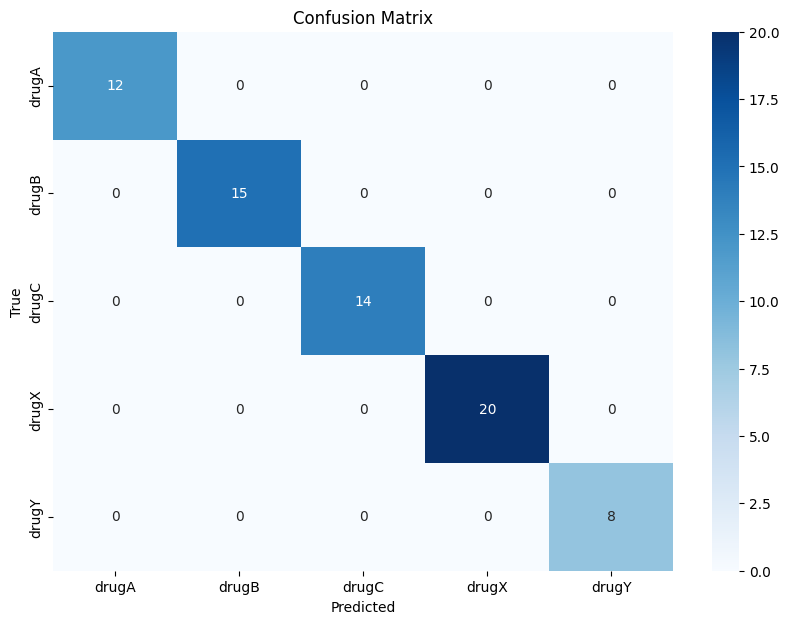

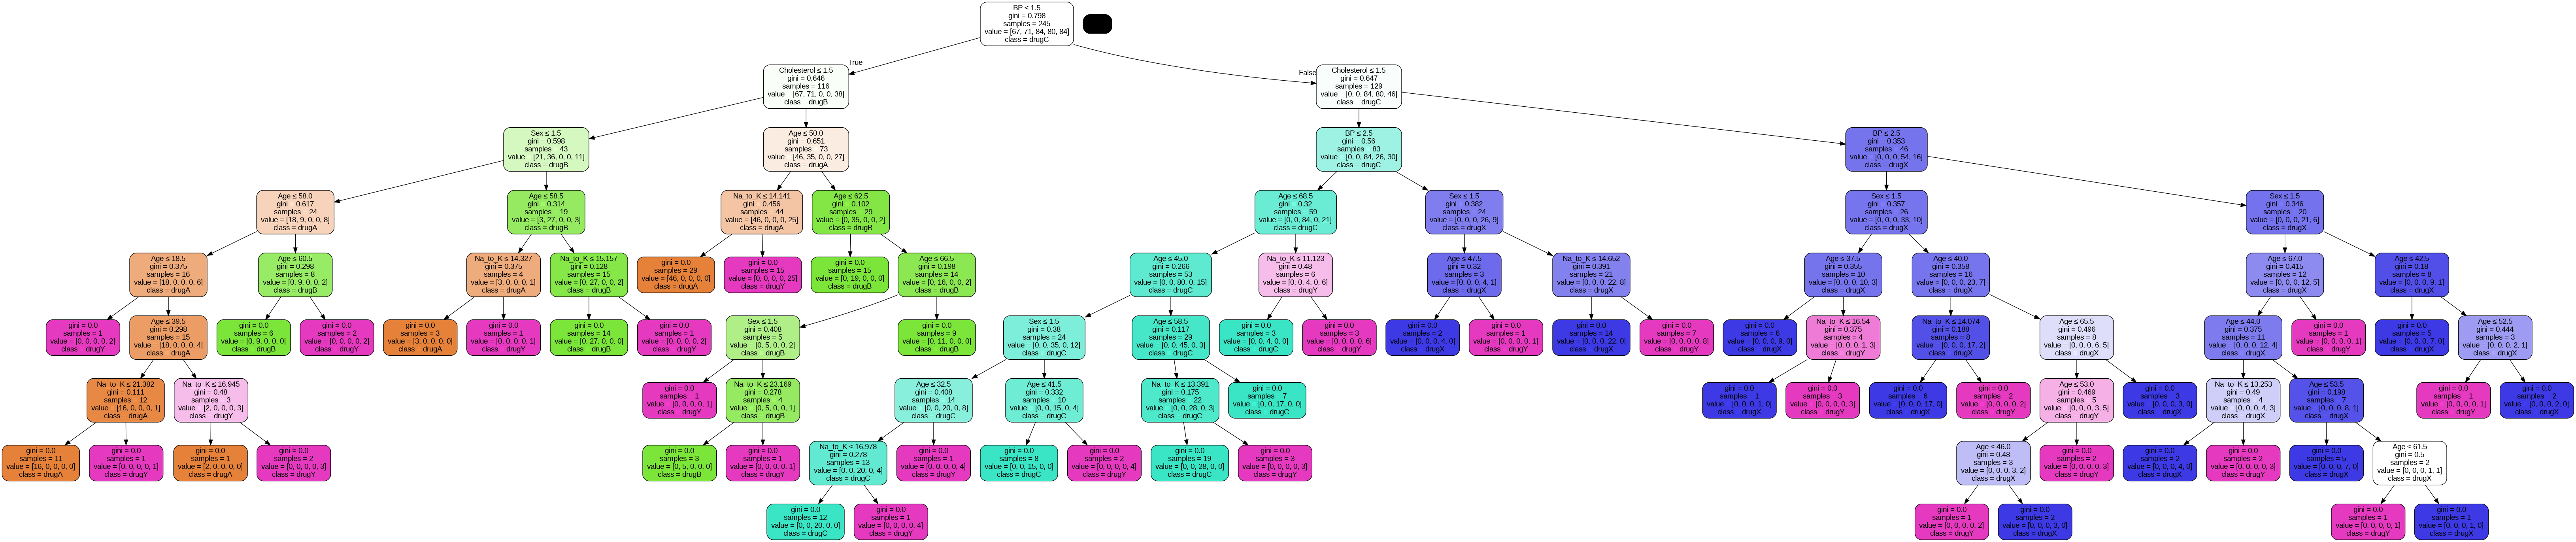

In [88]:
# Step 3: Build a decision tree classifier
clf = RandomForestClassifier(random_state=54 , n_estimators = 20) #, max_depth = 3
clf.fit(X_train_d, y_train_d)

# Step 4: Analyze the output
# Predict the classes for the test set
y_pred = clf.predict(X_test_d)

print(f"True Label: \n {y_test_d} \n \n Predicted Label: \n {y_pred}")
print(f"Accuracy: \n{clf.score(X_test_d, y_test_d)}")

# Evaluate the model
accuracy = accuracy_score(y_test_d, y_pred)
report = classification_report(y_test_d, y_pred)
conf_matrix = confusion_matrix(y_test_d, y_pred)


print("Classification Report:")
print(report)


# Visualization 2: Confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualization 1: Plot the decision tree
dot_data = export_graphviz(clf.estimators_[0], out_file=None,
                           feature_names=features.columns,
                           class_names=[str(c) for c in clf.classes_],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Part4 : K-Fold cross validation

Mean Accuracy: 0.9362318840579711
Best Fold: 6 with Accuracy: 0.9777777777777777


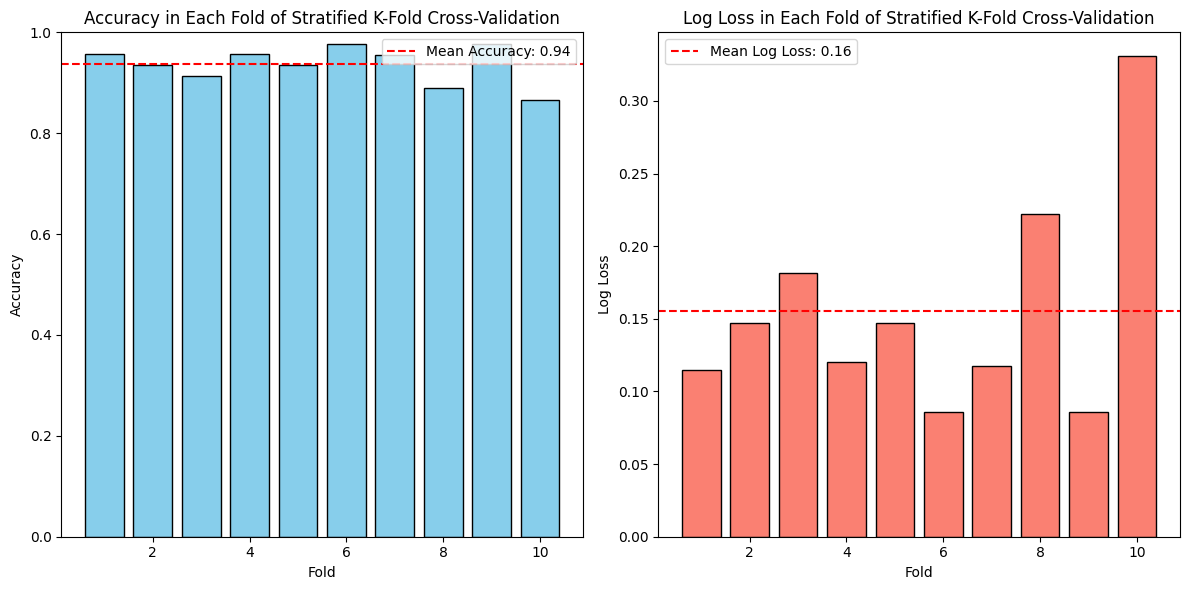

Final Model Accuracy: 0.9777777777777777
Final Model Log Loss: 0.08553198431939157


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

k = 10
skf = StratifiedKFold(n_splits=k)

accuracies = []
fold_indices = []
losses = []
train_test_indices = []

for fold, (train_index, test_index) in enumerate(skf.split(X_drug, y_drug)):
    X_train, X_test = X_drug[train_index], X_drug[test_index]
    y_train, y_test = y_drug[train_index], y_drug[test_index]

    model = DecisionTreeClassifier(random_state=54, ccp_alpha=0.1, criterion='entropy', splitter='best' ,max_depth=3) #,max_depth=3
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    loss = log_loss(y_test, y_pred_proba)
    losses.append(loss)
    train_test_indices.append((train_index, test_index))

    fold_indices.append(fold + 1)

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

best_fold_index = np.argmax(accuracies)
best_fold = fold_indices[best_fold_index]
print(f'Best Fold: {best_fold} with Accuracy: {accuracies[best_fold_index]}')

# Extract train and test data for the best fold
best_train_index, best_test_index = train_test_indices[best_fold_index]
X_train_best, X_test_best = X_drug[best_train_index], X_drug[best_test_index]
y_train_best, y_test_best = y_drug[best_train_index], y_drug[best_test_index]

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(fold_indices, accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in Each Fold of Stratified K-Fold Cross-Validation')
plt.ylim(0, 1)
plt.axhline(y=np.mean(accuracies), color='r', linestyle='--', label=f'Mean Accuracy: {np.mean(accuracies):.2f}')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.bar(fold_indices, losses, color='salmon', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.title('Log Loss in Each Fold of Stratified K-Fold Cross-Validation')
plt.axhline(y=np.mean(losses), color='r', linestyle='--', label=f'Mean Log Loss: {np.mean(losses):.2f}')
plt.legend()

plt.tight_layout()
plt.show()

"""plt.figure(figsize=(10, 6))
plt.bar(fold_indices, accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Performance in Each Fold of Stratified K-Fold Cross-Validation')
plt.ylim(0, 1)
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
plt.legend()
plt.show()

# Loss plot
plt.subplot(1, 2, 2)
plt.bar(fold_indices, losses, color='salmon', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.title('Log Loss in Each Fold of Stratified K-Fold Cross-Validation')
plt.axhline(y=np.mean(losses), color='r', linestyle='--', label=f'Mean Log Loss: {np.mean(losses):.2f}')
plt.legend()

plt.tight_layout()
plt.show()"""

# Training final model with the best fold data
final_model = DecisionTreeClassifier(random_state=54, ccp_alpha=0.1, criterion='entropy', splitter='best' ,max_depth=3)
final_model.fit(X_train_best, y_train_best)

# Evaluating the final model on the test data of the best fold
final_accuracy = accuracy_score(y_test_best, final_model.predict(X_test_best))
final_loss = log_loss(y_test_best, final_model.predict_proba(X_test_best))

print(f'Final Model Accuracy: {final_accuracy}')
print(f'Final Model Log Loss: {final_loss}')